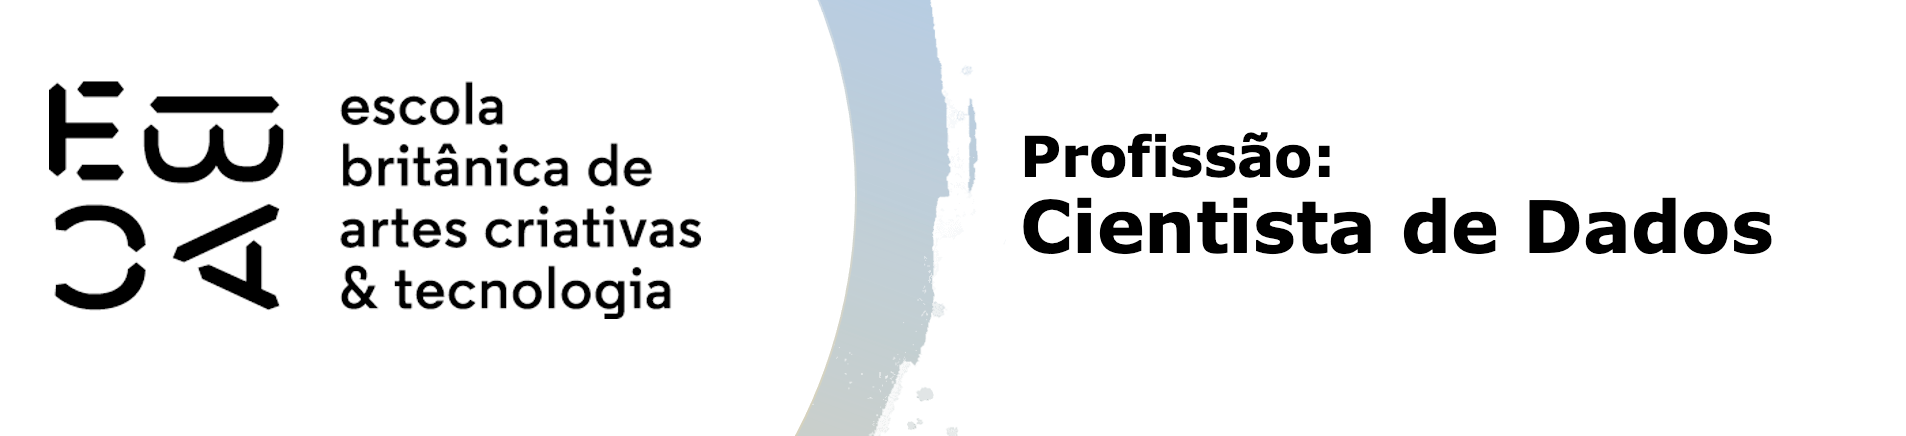

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
#tratamento das variaveis

# cria um dicionário de mapeamento dos meses para seus correspondentes numéricos
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

#tratamento da coluna
df['Month'] = df['Month'].replace(month_map)


# cria um dicionário de mapeamento para o tipo de visitante 0 para novo,1 para retorno e 2 para outros.
visitor_map = {'New_Visitor': 0,'Returning_Visitor': 1, 'Other': 2}

#tratamento da coluna
df['VisitorType'] = df['VisitorType'].replace(visitor_map)

#

compra_map = {0: 'False', 1: 'True'}
df['Revenue'] = df['Revenue'].replace(visitor_map)


In [7]:
#checando se todas as variaveis são númericas ou boleanas.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,0.869505
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.356740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000


In [9]:
import sweetviz
import warnings
warnings.filterwarnings('ignore')

                                             |          | [  0%]   00:00 -> (? left)


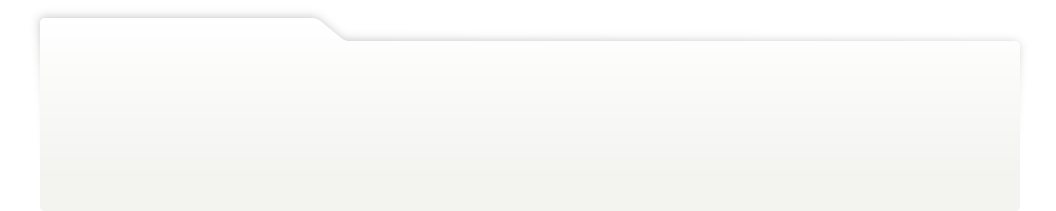
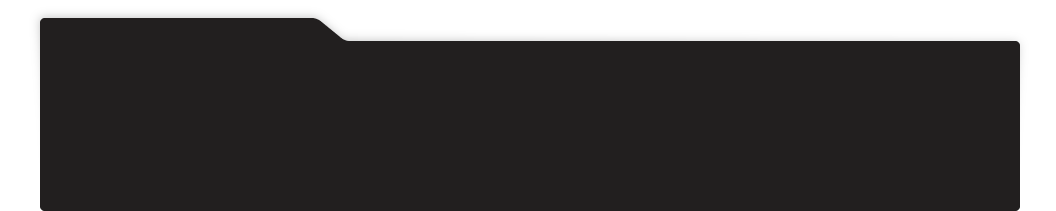
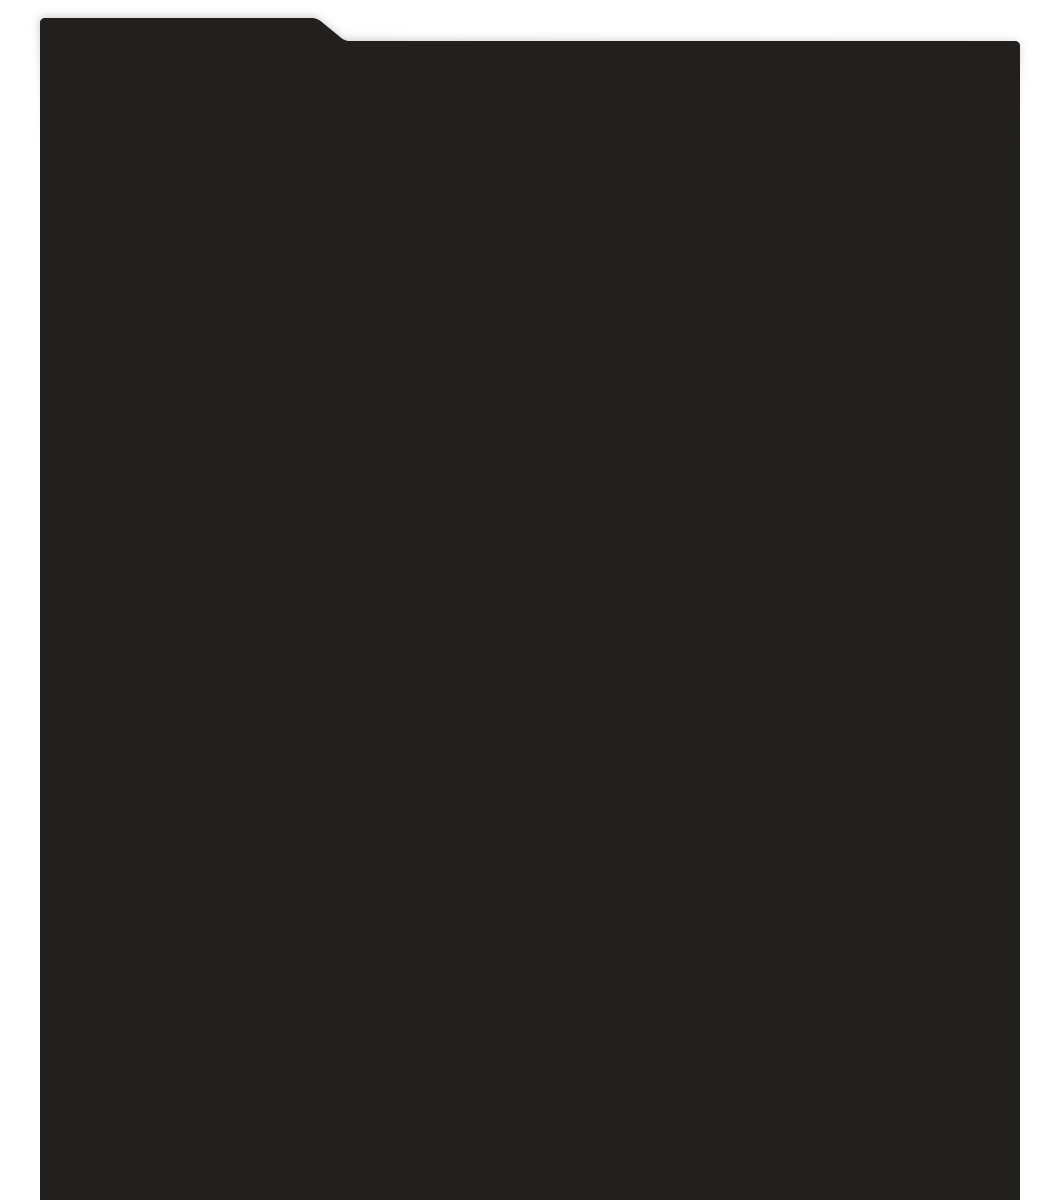
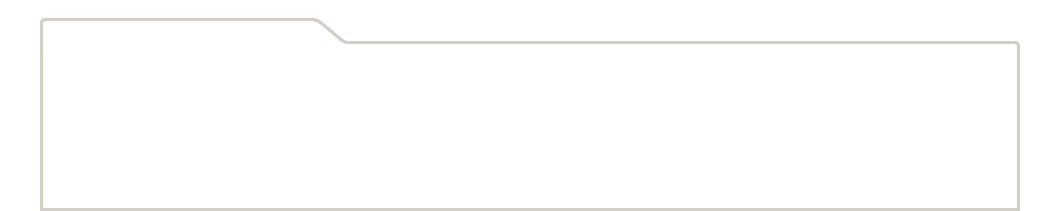
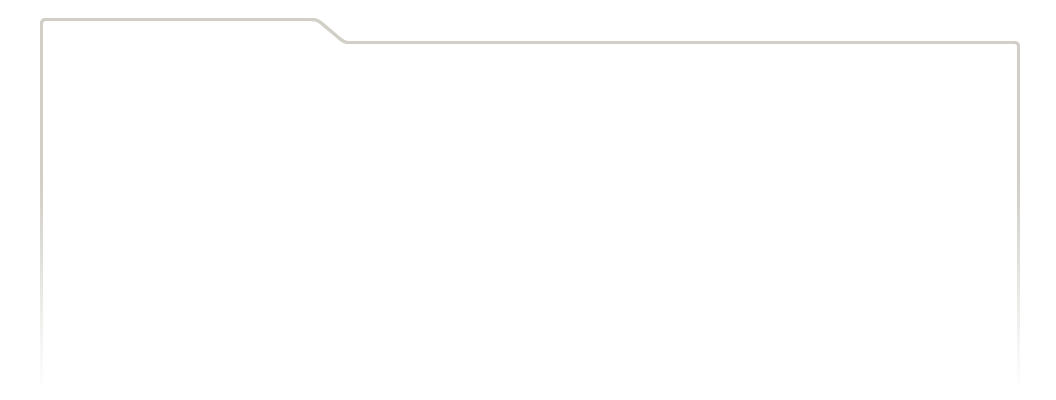
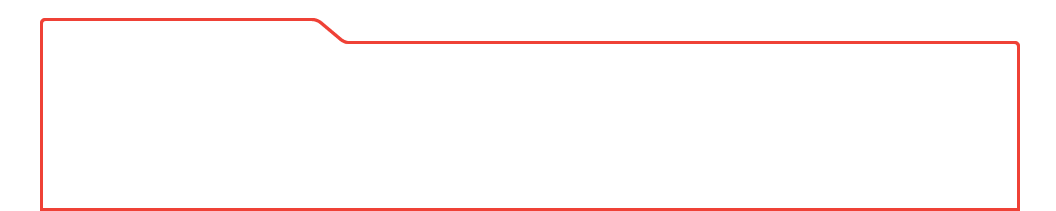
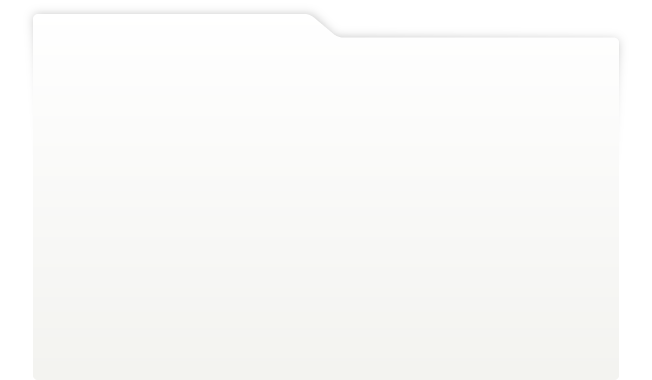
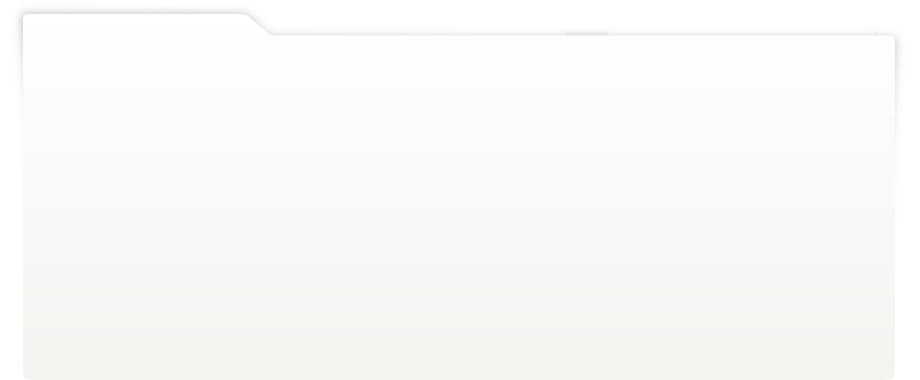
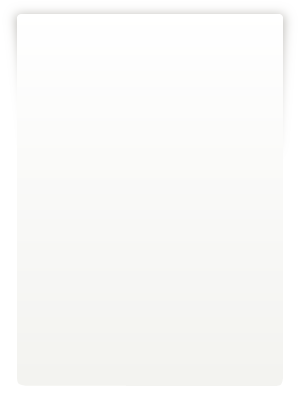
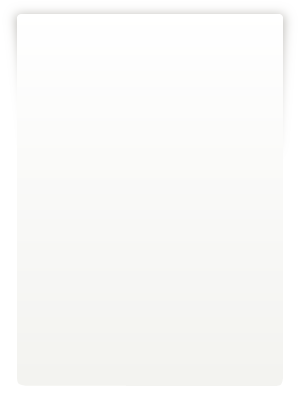
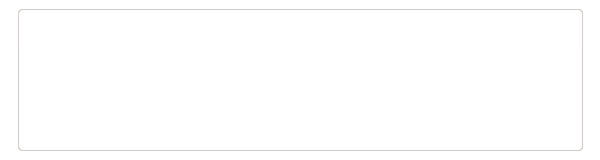
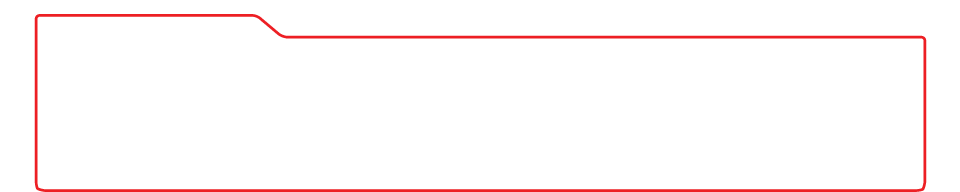
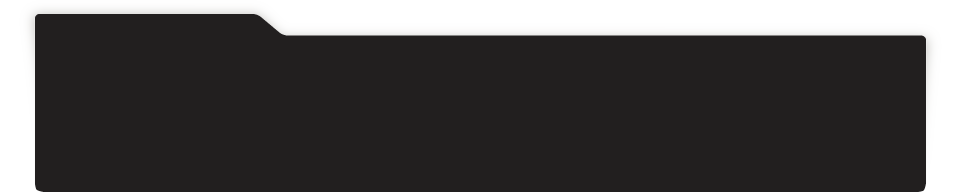
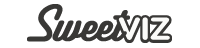
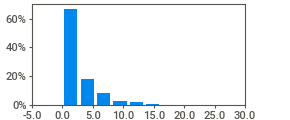
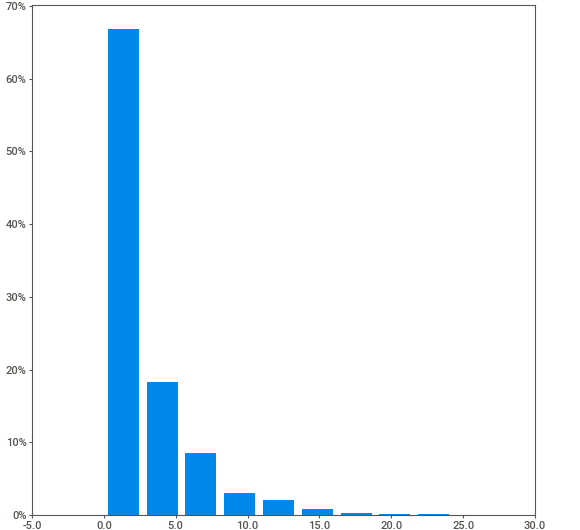
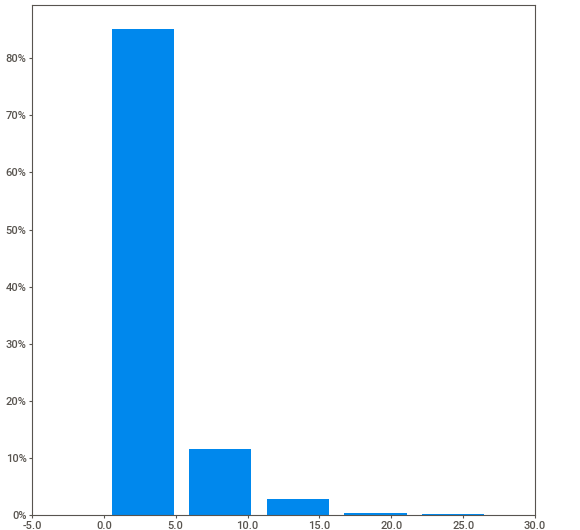
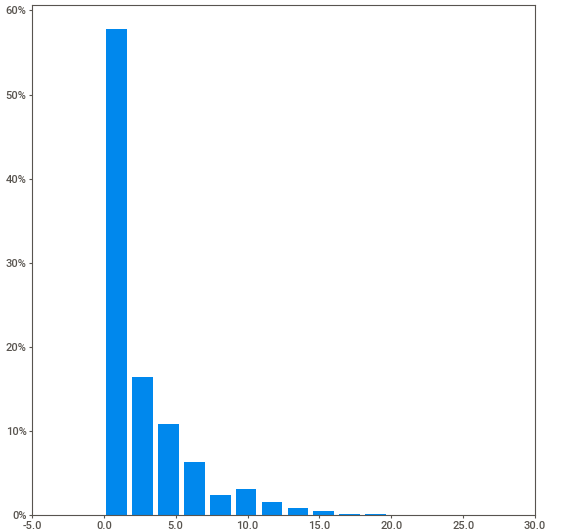
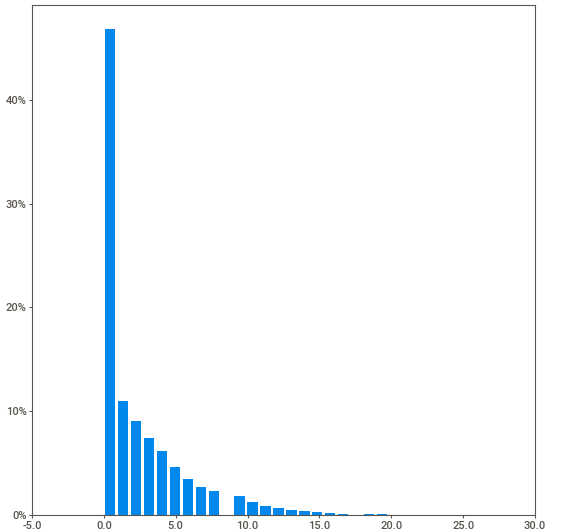
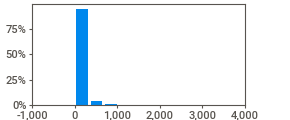
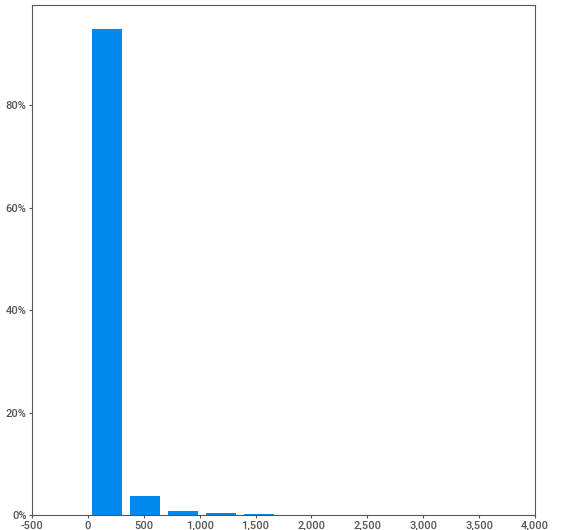
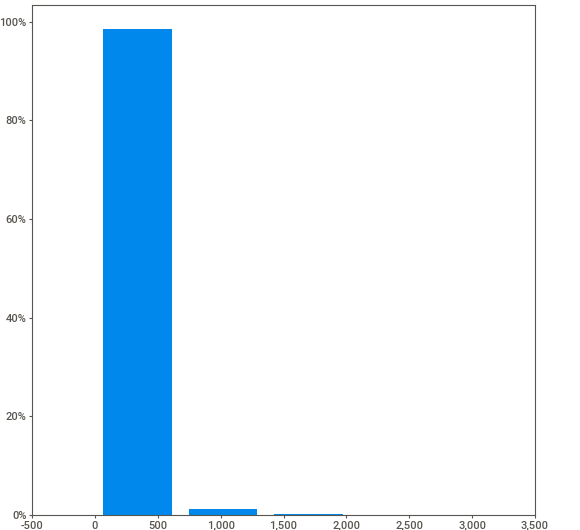
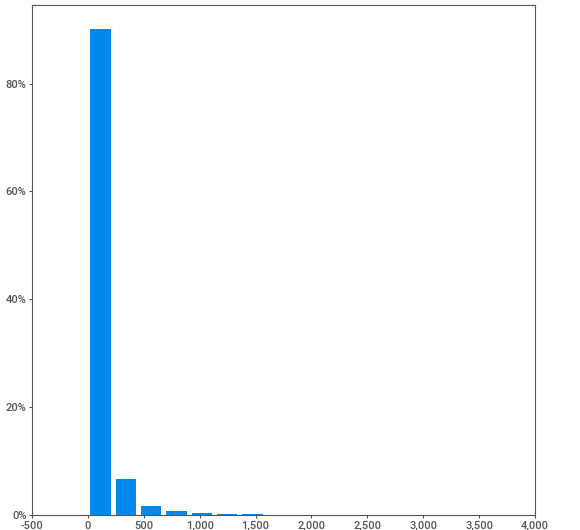
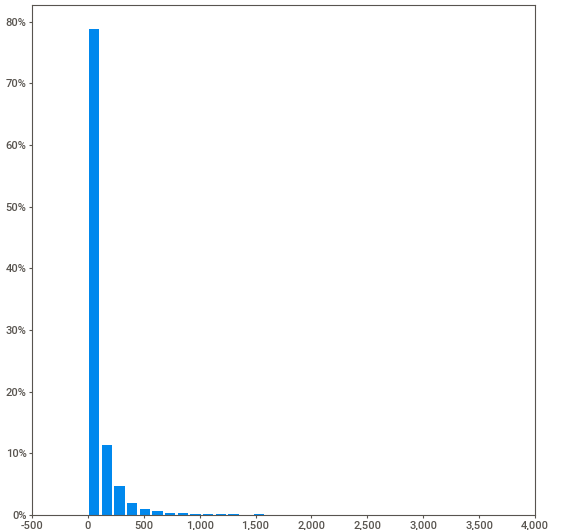
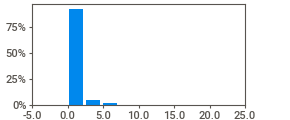
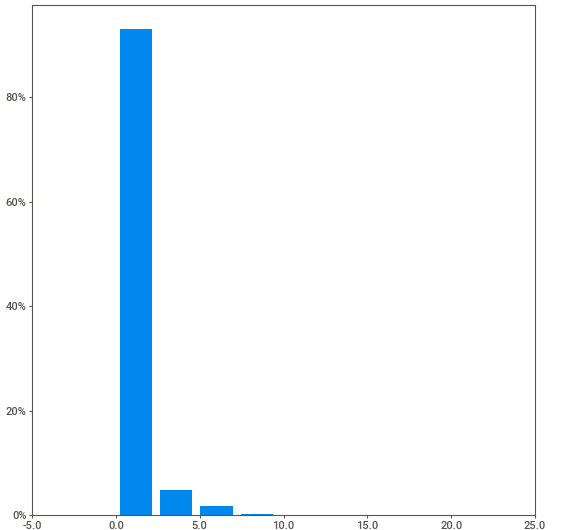
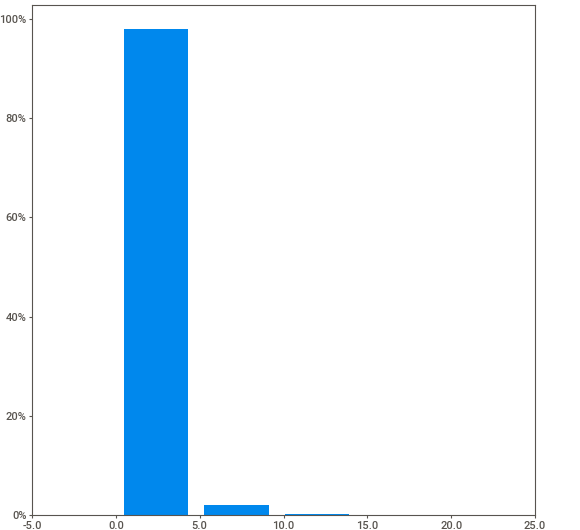
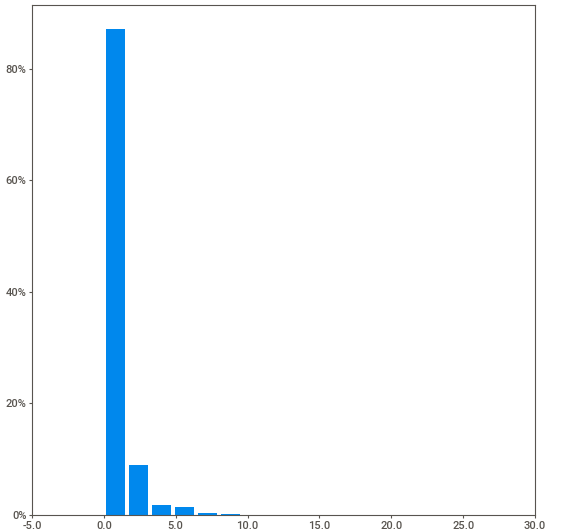
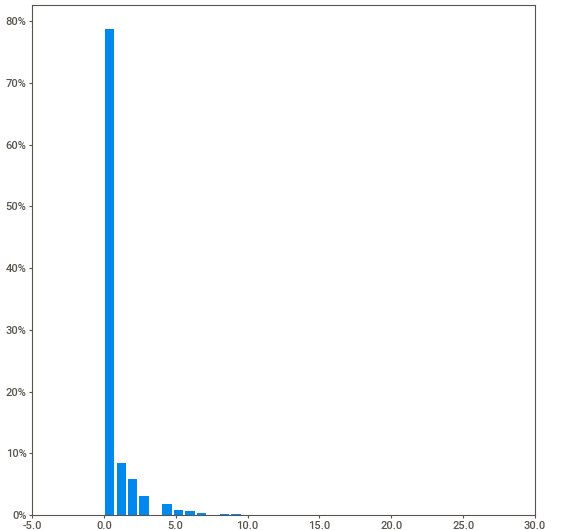
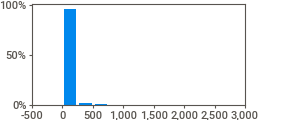
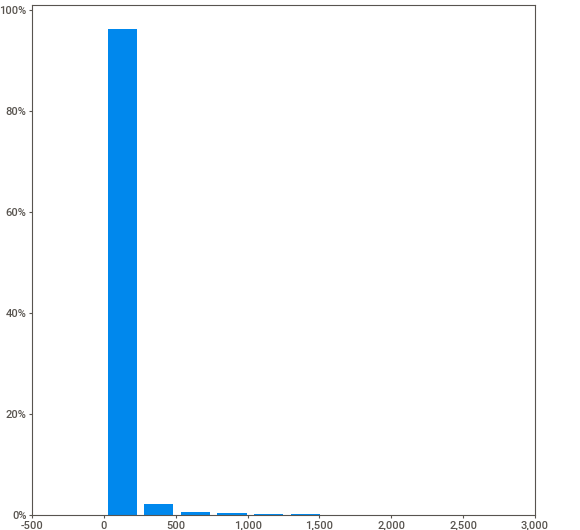
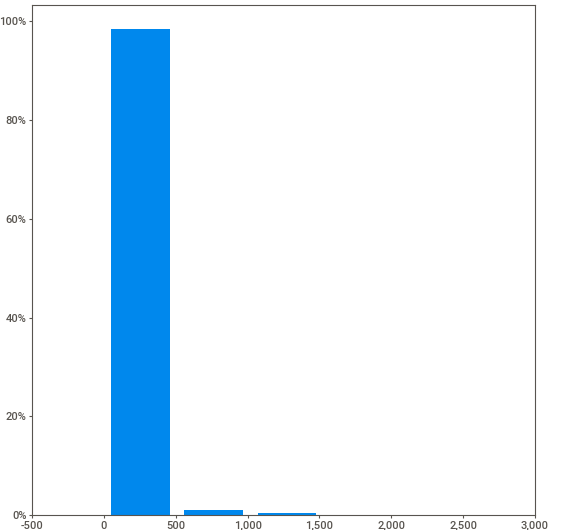
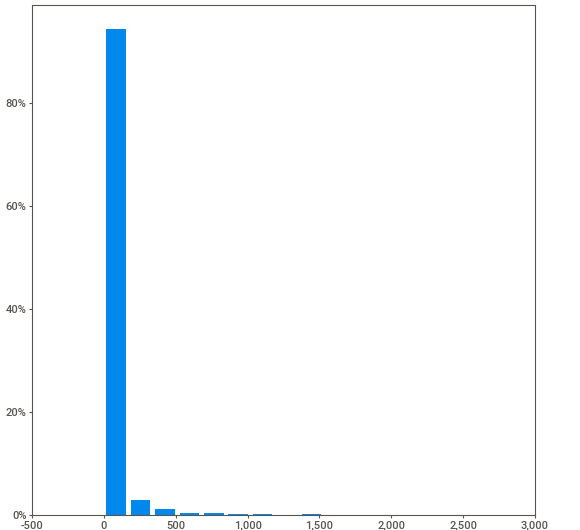
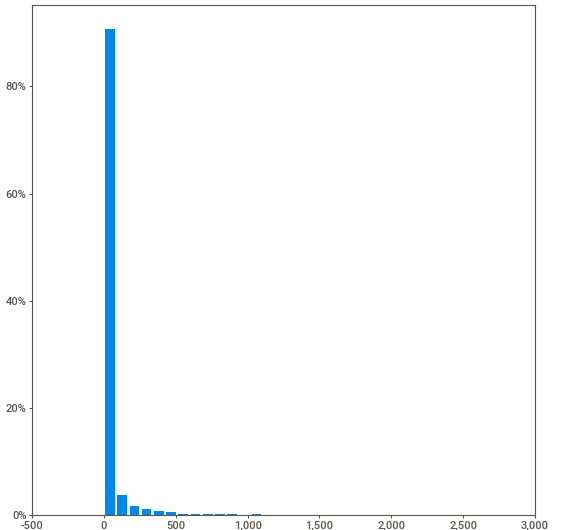
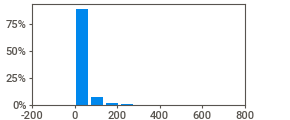
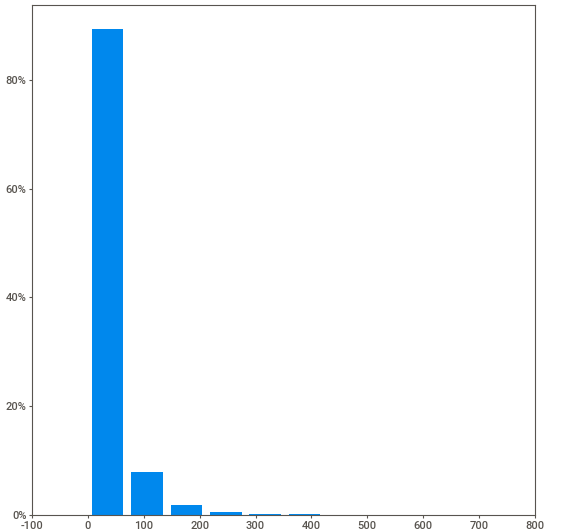
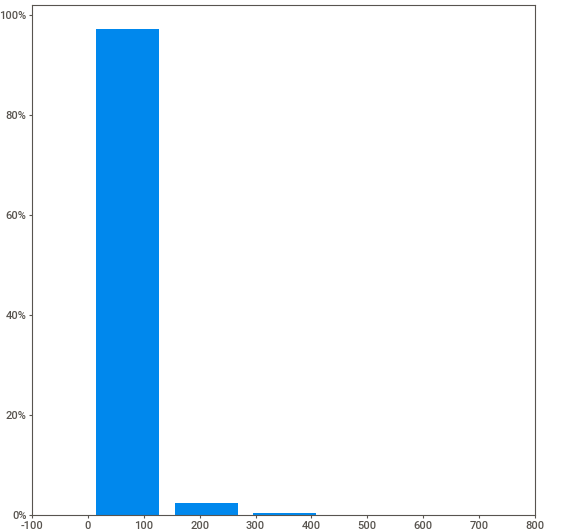
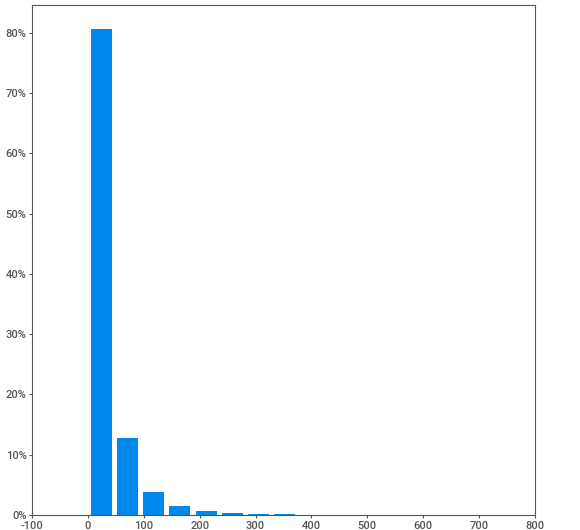
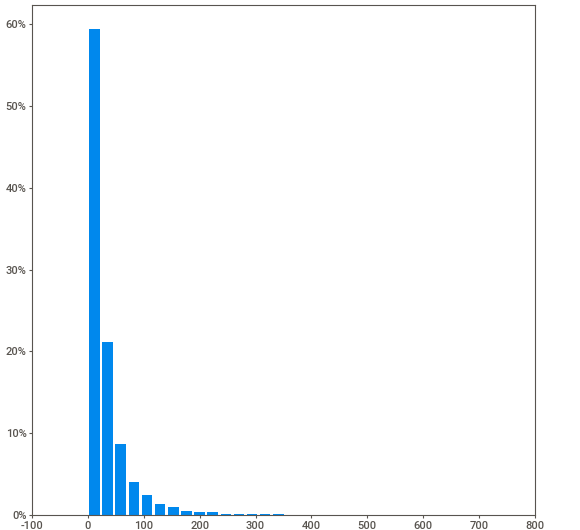
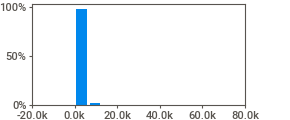
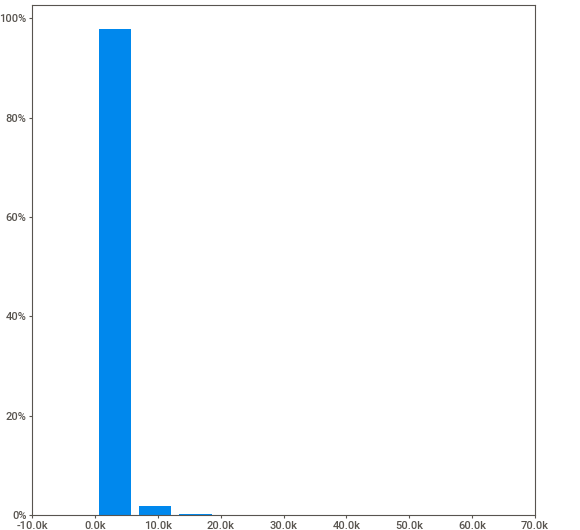
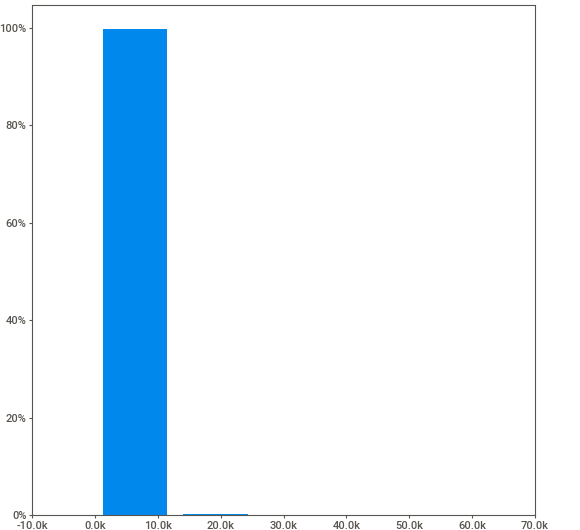
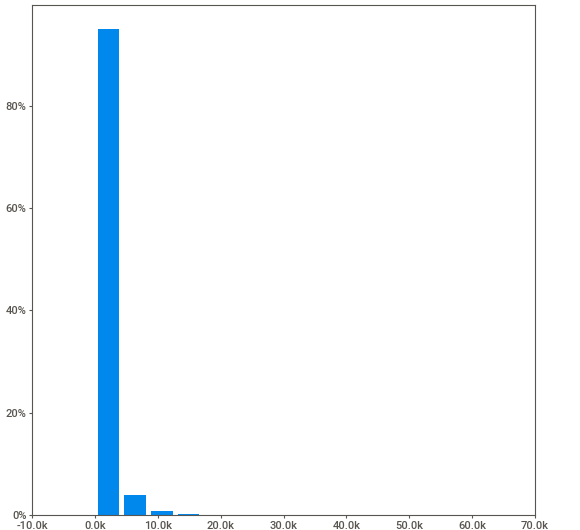
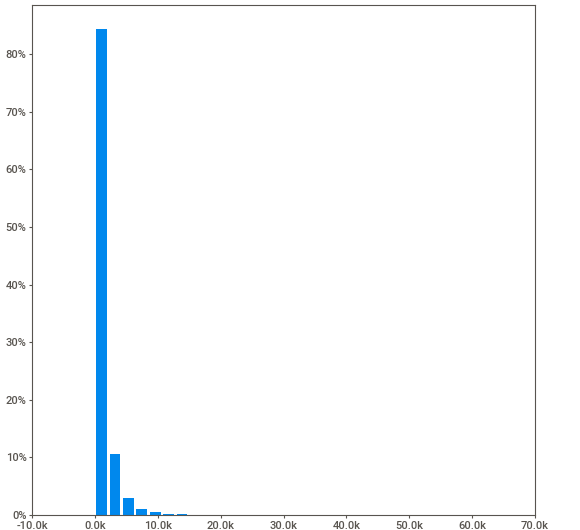
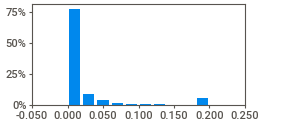
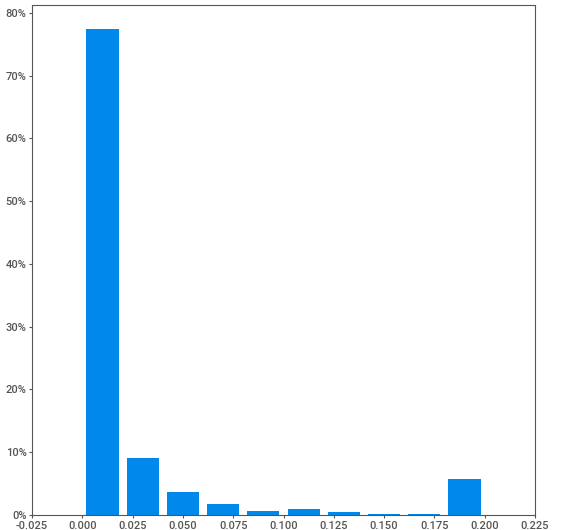
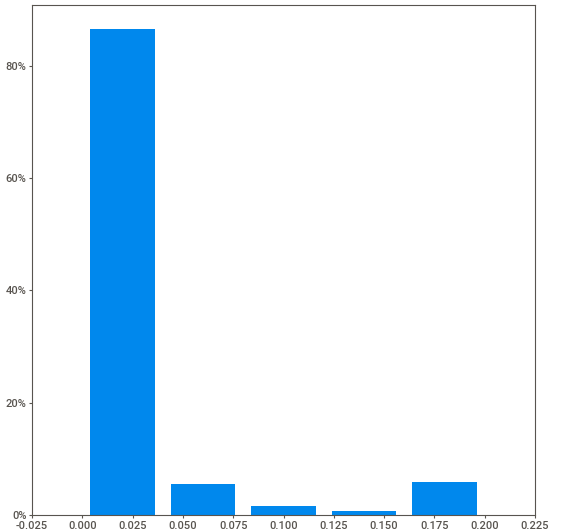
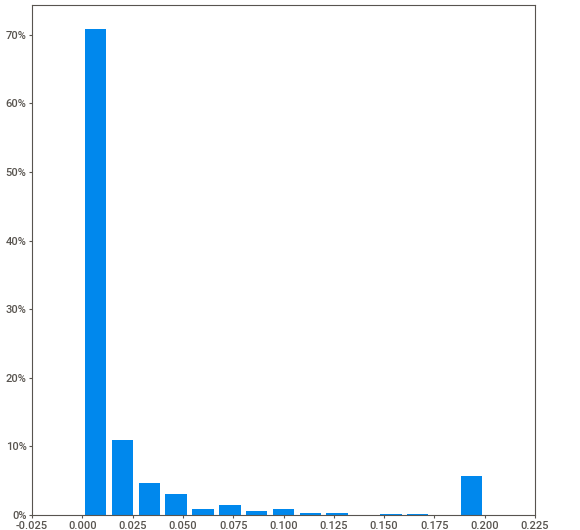
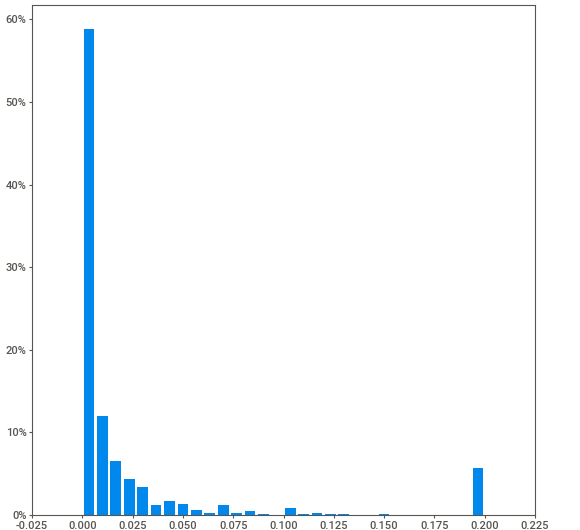
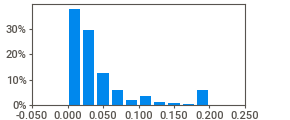
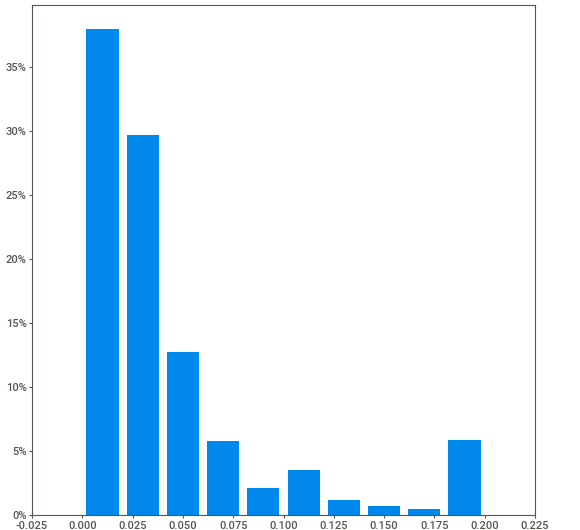
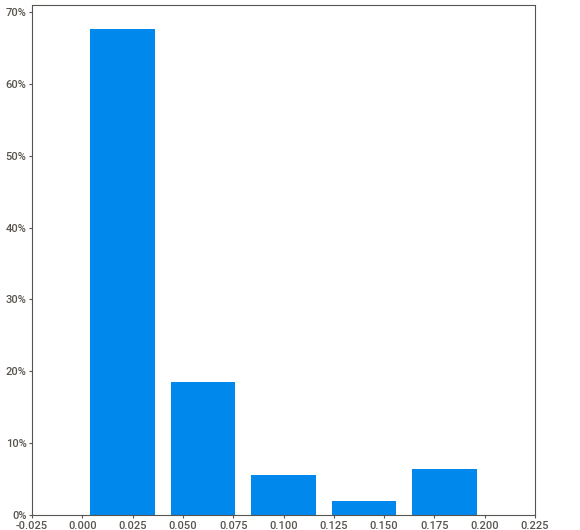
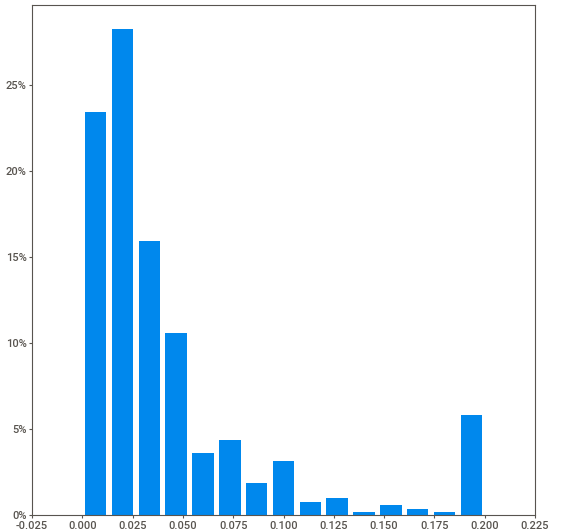
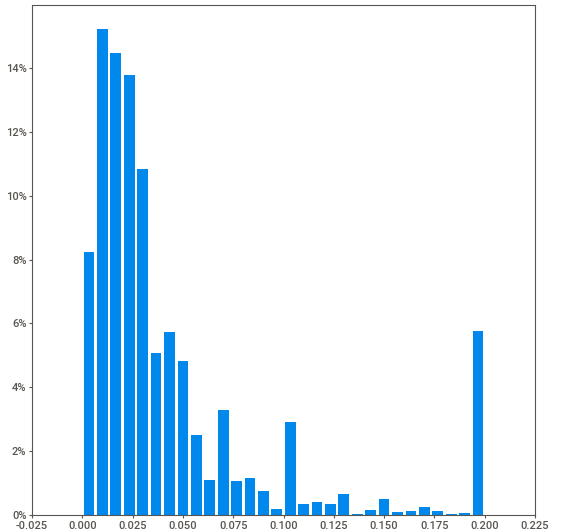
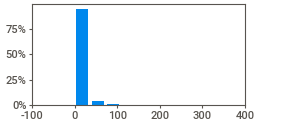
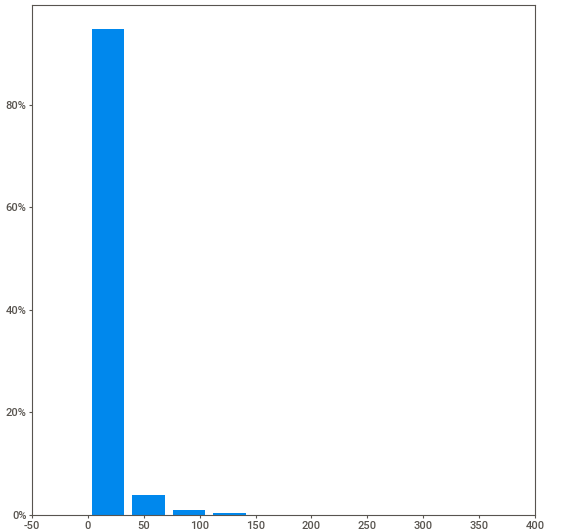
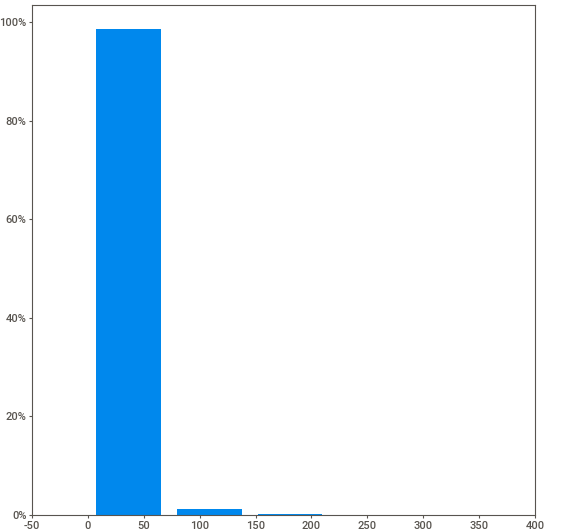
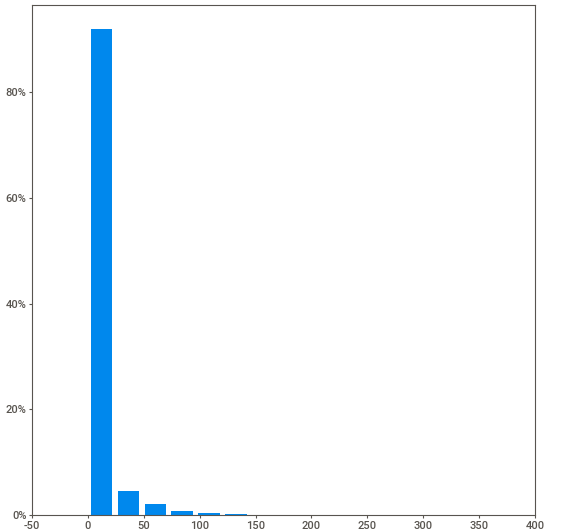
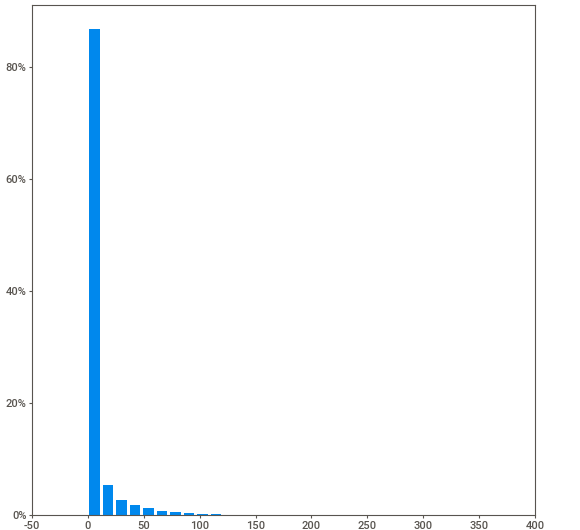
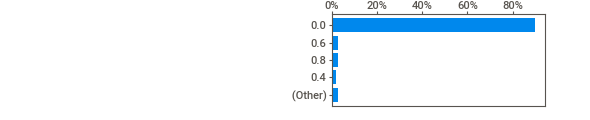
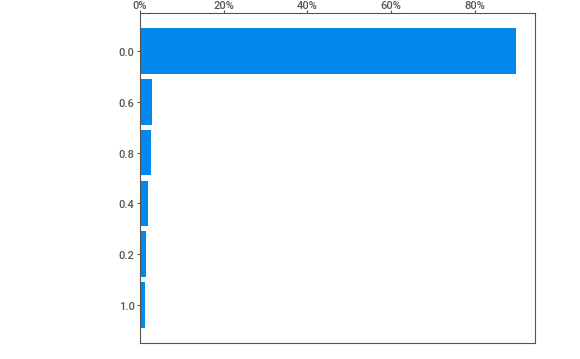
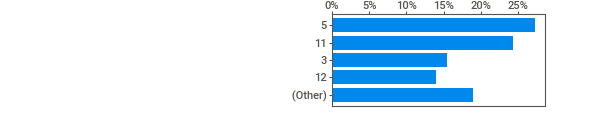
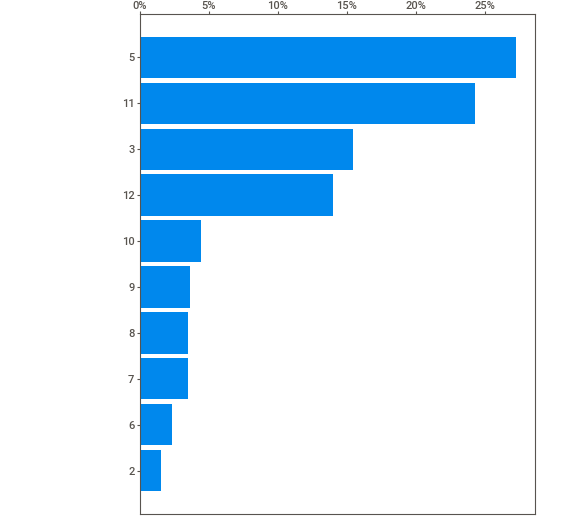
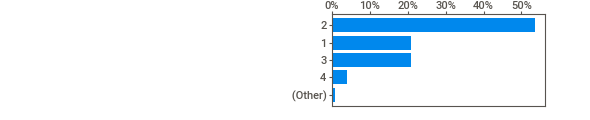
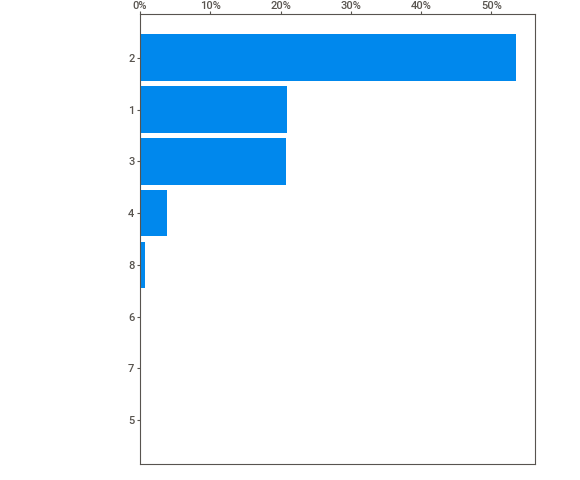
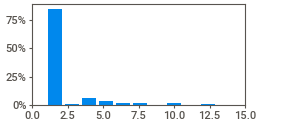
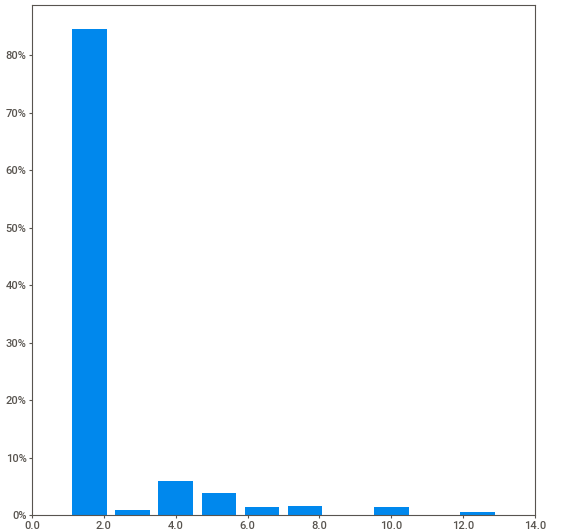
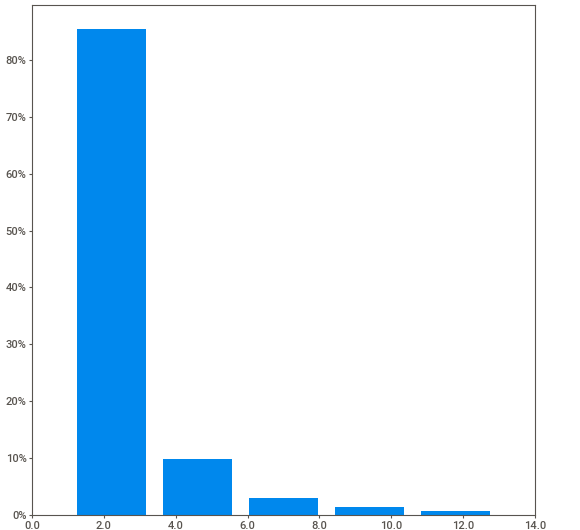
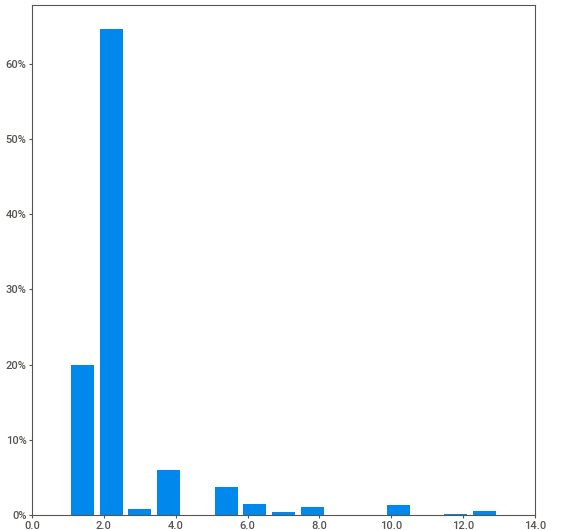
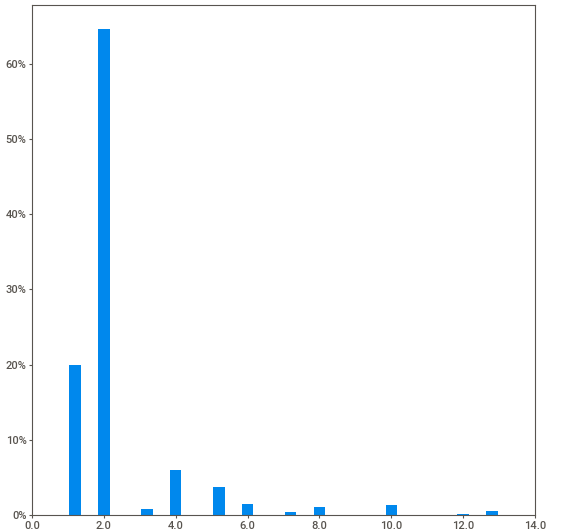
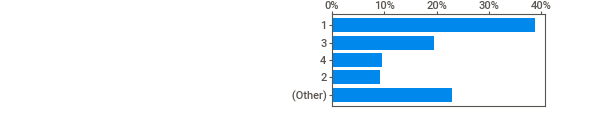
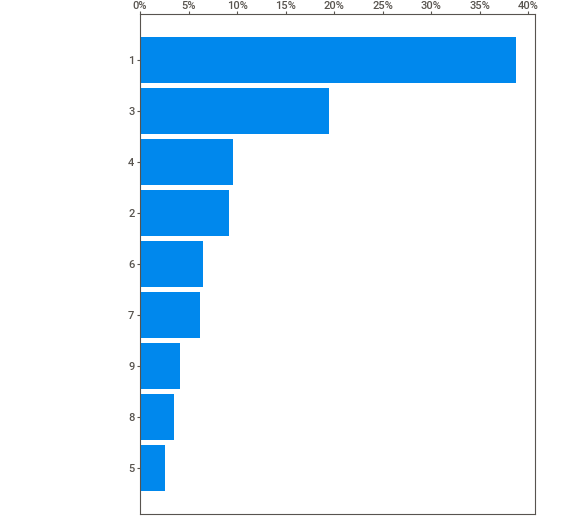
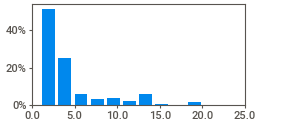
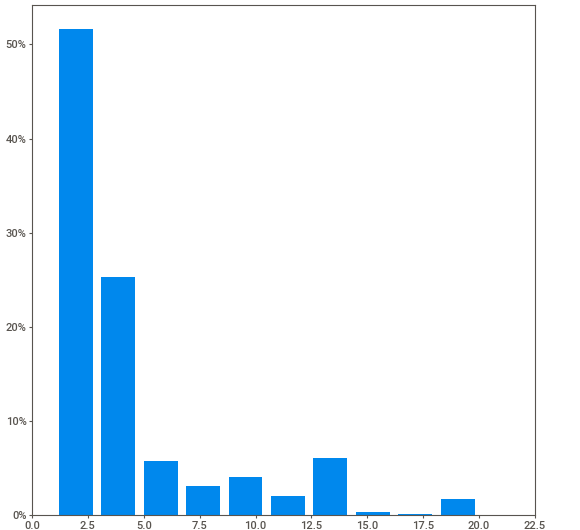
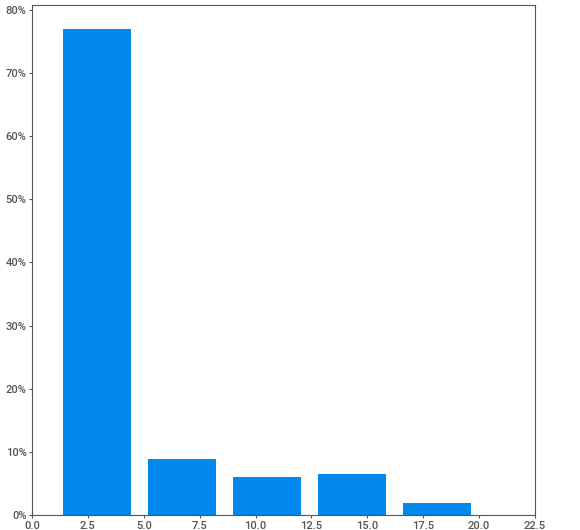
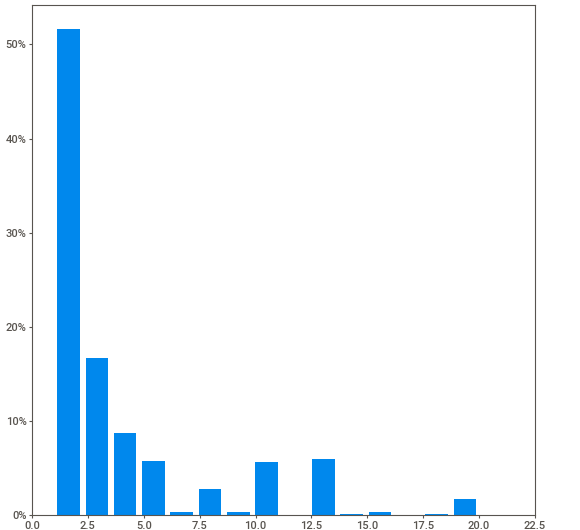
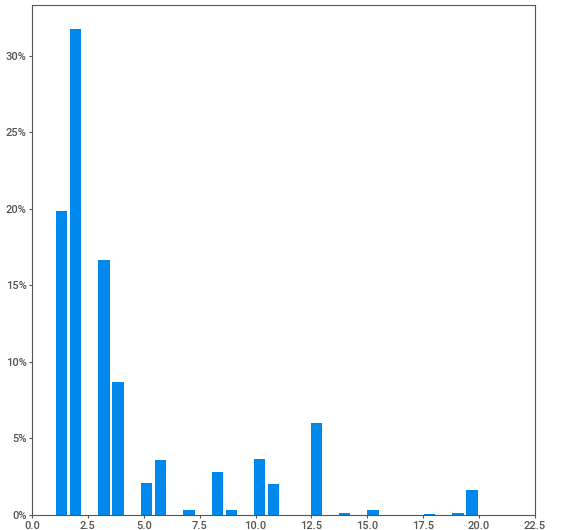
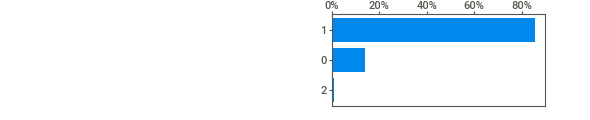
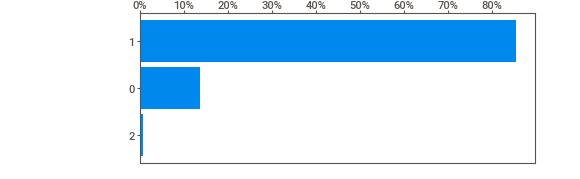
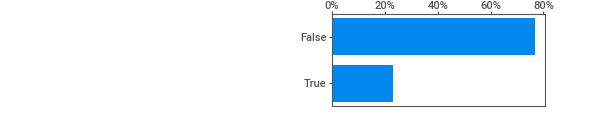
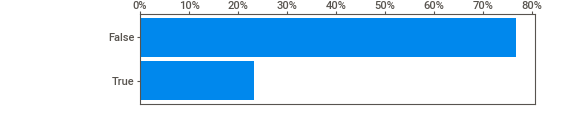
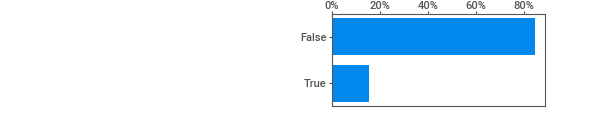
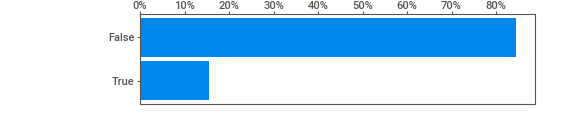
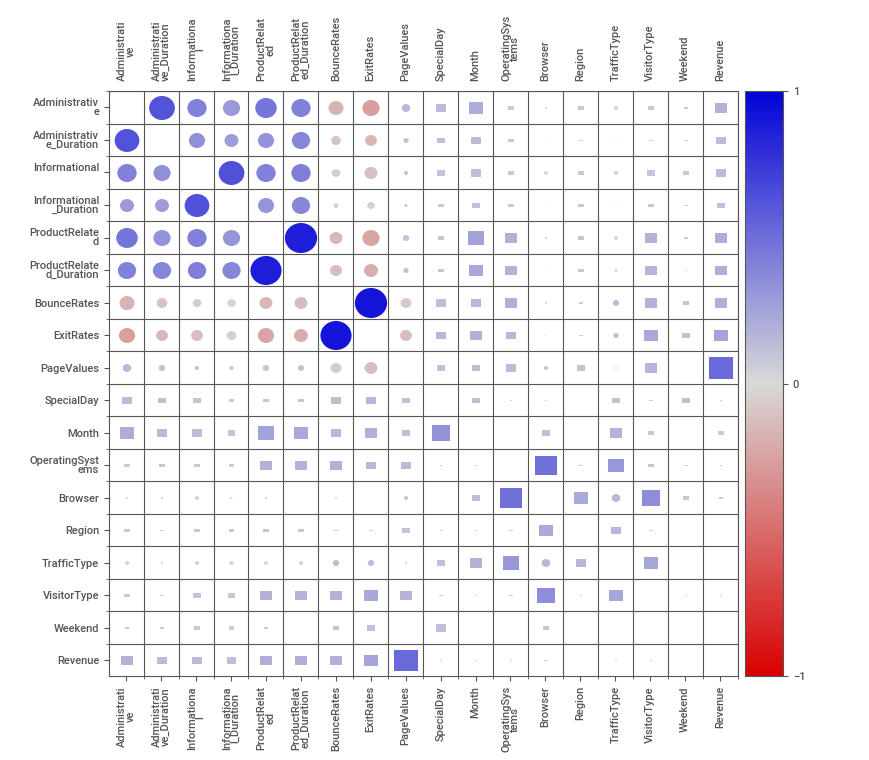
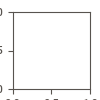

Report './.html' was saved to storage.


In [10]:
dataviz = sweetviz.analyze([df, 'dataviz'])
dataviz.show_notebook(filepath='./.html')
dataviz 

dataviz via sweetviz </>

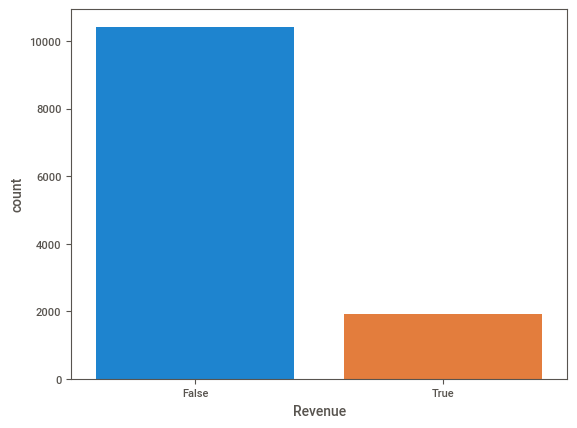

In [11]:
sns.countplot(data=df,x= 'Revenue')
plt.show()

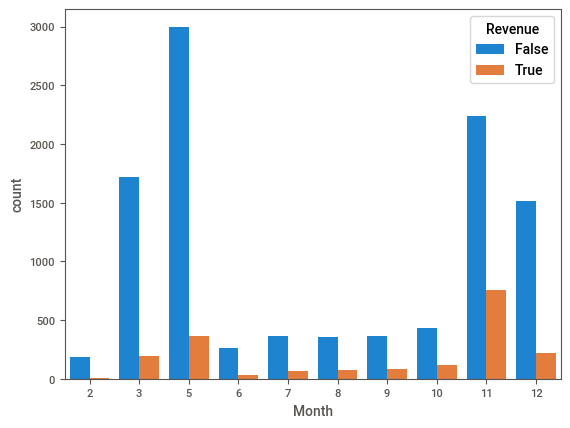

In [12]:
sns.countplot(data=df, x='Month', hue='Revenue')
plt.show()

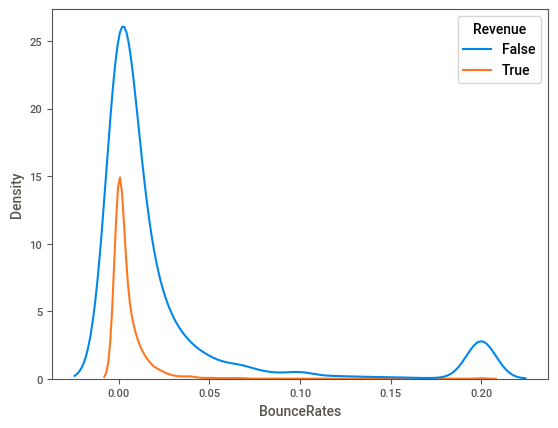

In [13]:
sns.kdeplot(data=df, x='BounceRates', hue='Revenue')
plt.show()

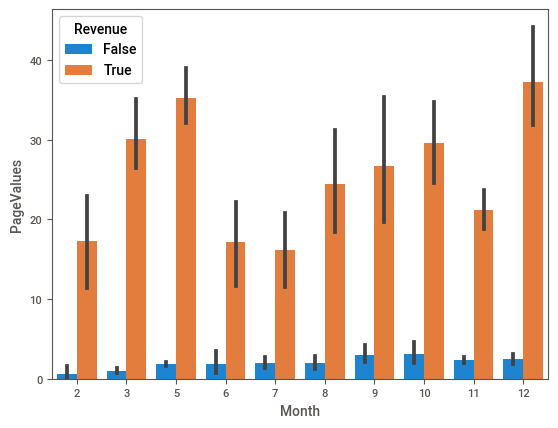

In [14]:
sns.barplot(data=df, x='Month', y='PageValues', hue='Revenue')
plt.show()

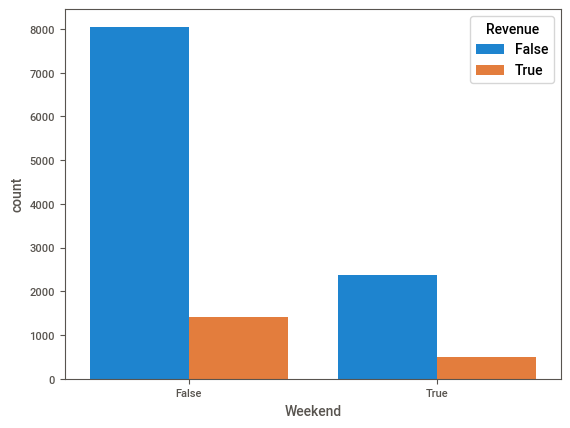

In [15]:
sns.countplot(data=df, x='Weekend', hue='Revenue')
plt.show()

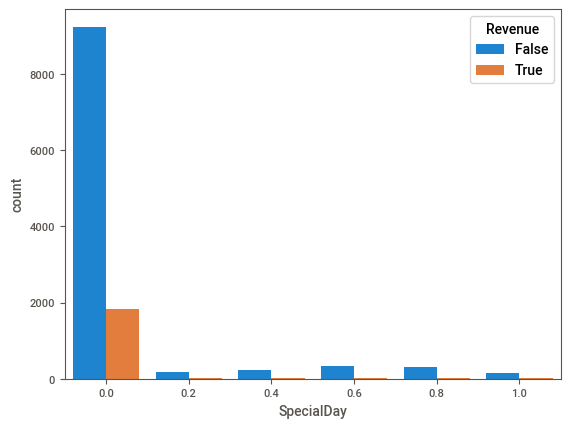

In [16]:
sns.countplot(data=df, x='SpecialDay', hue='Revenue')
plt.show()

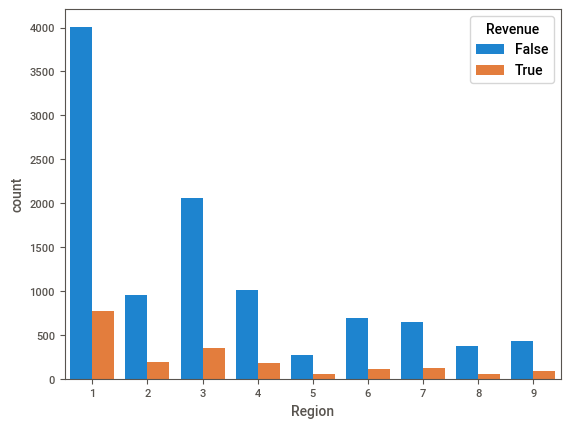

In [17]:
sns.countplot(data=df, x='Region', hue='Revenue')
plt.show()

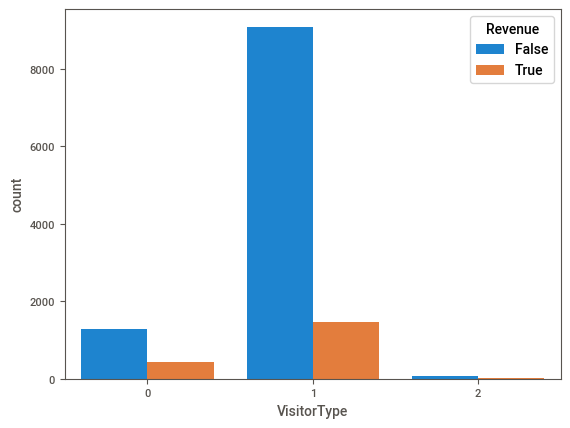

In [18]:
sns.countplot(data=df, x='VisitorType', hue='Revenue')
plt.show()

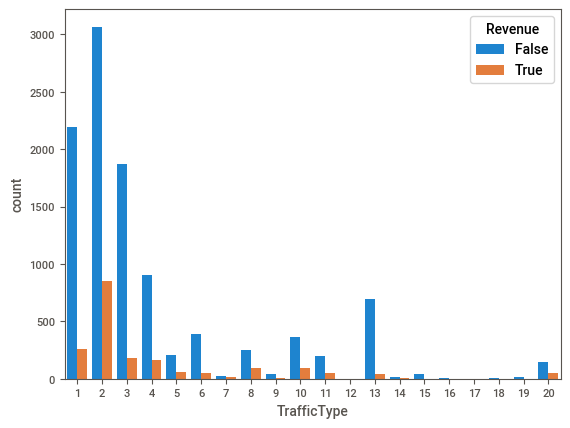

In [19]:
sns.countplot(data=df, x='TrafficType', hue='Revenue')
plt.show()

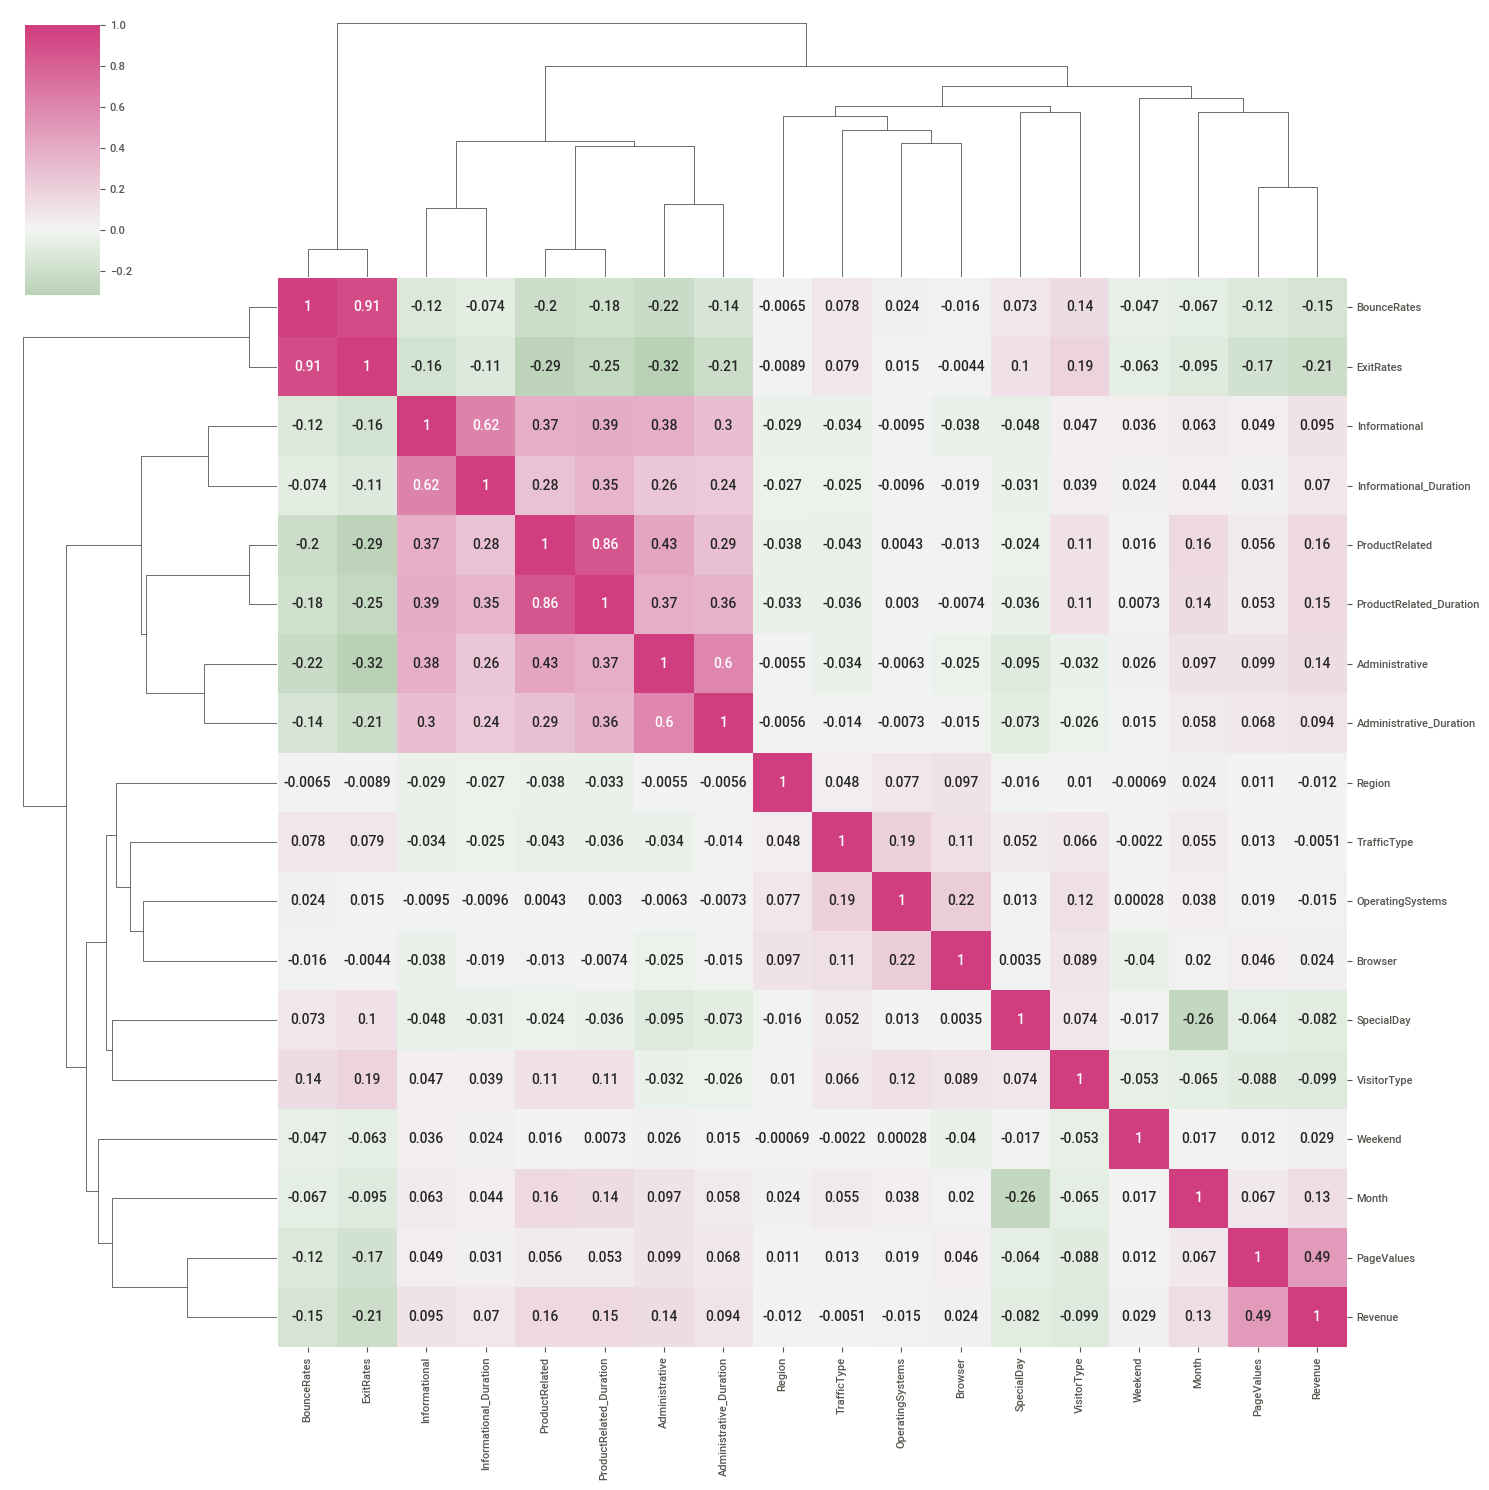

In [20]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 5, center = 'light')
sns.clustermap(df.corr(), figsize=(15, 15), center = 0,cmap=cmap, annot = True)

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm

In [22]:
#seleção de variaveis.
df_std = df.copy()
df_std = df_std.drop('Revenue', axis=1)

In [23]:
#padronizar 

df_std = pd.DataFrame(StandardScaler().fit_transform(df_std), columns = df_std.columns)
df_std['Revenue'] = df['Revenue']

In [24]:
med_por_grupo = df_std.groupby('Revenue').median()
med_por_grupo

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
Revenue,,,,,,,,,,,,,,,,,
False,-0.696993,-0.457191,-0.396478,-0.244931,-0.353725,-0.357734,-0.369920,-0.298415,-0.317178,-0.308821,-0.192173,-0.136078,-0.207952,-0.061364,-0.514182,0.365812,-0.550552
True,-0.094882,-0.160953,-0.396478,-0.244931,-0.061418,-0.044335,-0.457683,-0.557116,0.585365,-0.308821,0.986828,-0.136078,-0.207952,-0.477771,-0.514182,0.365812,-0.550552


In [30]:
variaveis = med_por_grupo.abs().idxmax(axis=1).values
colunas

array(['Administrative', 'Month'], dtype=object)

In [31]:
med_por_grupo[variaveis]

,Administrative,Month
Revenue,,
False,-0.696993,-0.192173
True,-0.094882,0.986828


In [39]:
#metodo cotovelo
SQD = []
K = range(1,5)
for k in tqdm(K):
    km = KMeans(n_clusters=k)
    km = km.fit(df_std[variaveis])
    SQD.append(km.inertia_)

  0%|          | 0/4 [00:00<?, ?it/s]

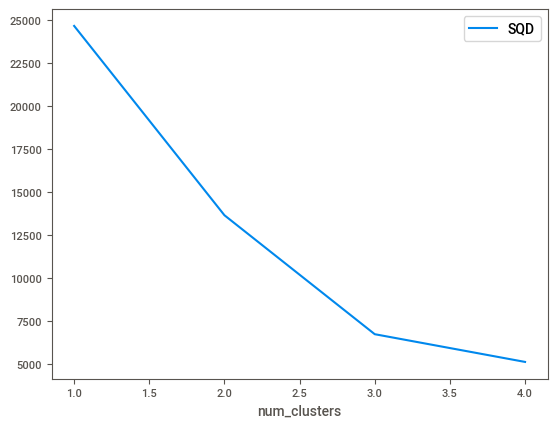

In [40]:
cotovelo = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
cotovelo.plot(x = 'num_clusters', y = 'SQD');

In [41]:
#Metodo silueta

# Inicializar uma lista vazia que vai conter os valores da silueta média
siluetas = []
# Este é o número máximo de grupos que vamos testar
max_clusters = 5

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # Aqui rodamos o k-means
    km = KMeans(n_clusters=n_clusters).fit(df_std[variaveis])
    # Aqui calculamos a silueta e guardamos o resultado na lista 'siluetas'
    siluetas.append(silhouette_score(df_std[variaveis], km.labels_))
    # Essa list comprehendion define o nome dos grupos
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    # Agora vamos adicionar uma coluna no dataframe X_pad com o agrupamento construido
    df_std['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)

  0%|          | 0/4 [00:00<?, ?it/s]

<Axes: xlabel='n_clusters'>

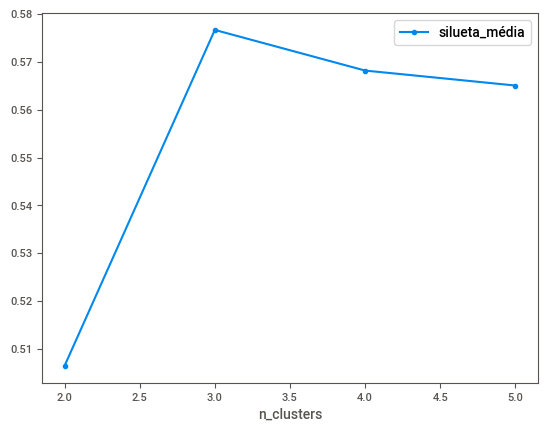

In [42]:
df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})

df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [48]:
#Os dois metodos sugerem um cluster de 3 grupos.
pd.crosstab(df_std['Revenue'], df_std['grupos_3'])

grupos_3,grupo_0,grupo_1,grupo_2
Revenue,,,
False,4076,1400,4946
True,921,452,535


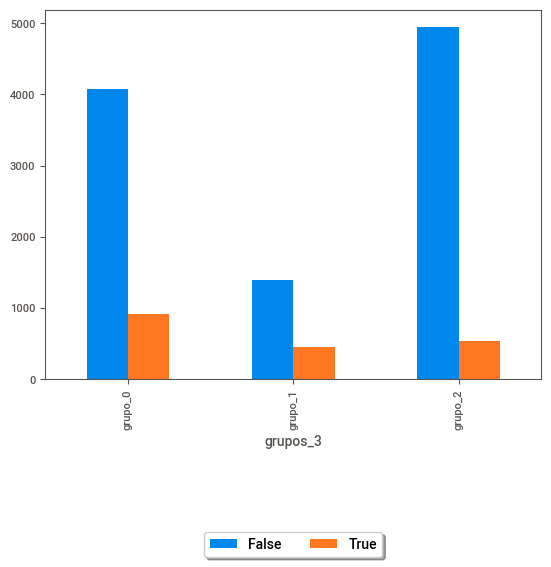

In [49]:
#Com 3 cluester o grupo mais propenço a realizar compras é o grupo 0.
ax = df_std.groupby(['grupos_3', 'Revenue'])['Revenue'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);

In [55]:
pd.crosstab(df_std['Revenue'], df_std['grupos_4'])

grupos_4,grupo_0,grupo_1,grupo_2,grupo_3
Revenue,,,,
False,1351,4044,4175,852
True,282,917,374,335


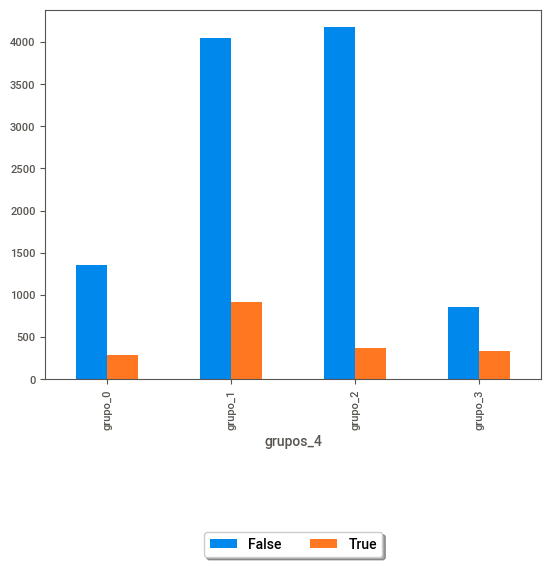

In [56]:
#Com 3 cluester o grupo mais propenço a realizar compras é o grupo 1.
ax = df_std.groupby(['grupos_4', 'Revenue'])['Revenue'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

Após a realização do K-means de 3 grupos, o grupo mais propenso a compra é o grupo 0 já o k-means com 4 grupos o grupo mais propenso a realizar compras é o grupo 1. Parece não haver diferença na probabilidade de compra entre o grupo 0 e o grupo 1 em ambas as clusterizações.

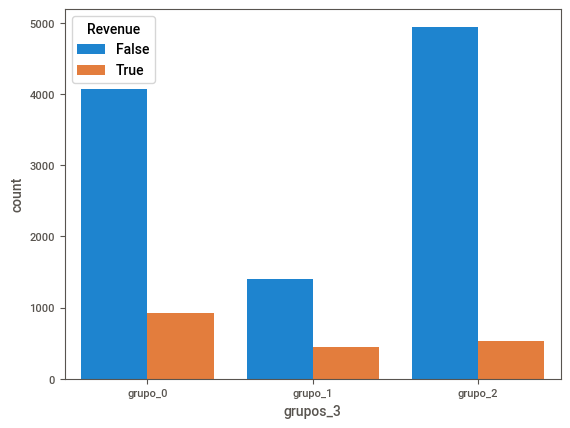

In [60]:
sns.countplot(data=df_std, x='grupos_3', hue='Revenue')
plt.show()

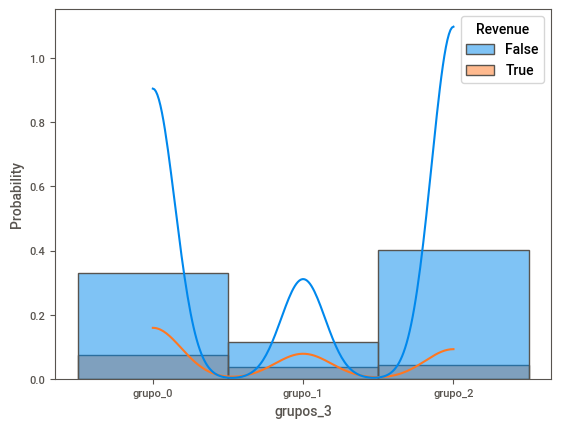

In [62]:
sns.histplot(data=df_std, x='grupos_3', hue='Revenue', stat='probability', kde=True)
plt.show()

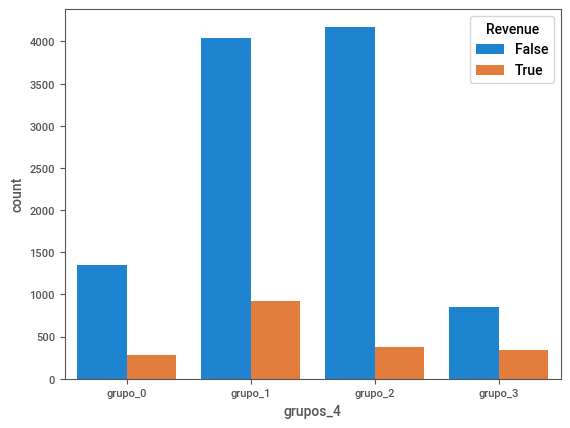

In [64]:
sns.countplot(data=df_std, x='grupos_4', hue='Revenue')
plt.show()

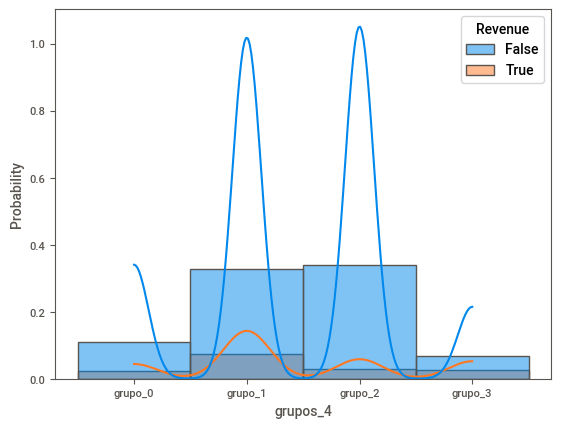

In [63]:
sns.histplot(data=df_std, x='grupos_4', hue='Revenue', kde=True, stat='probability')
plt.grid(False)
plt.show()